# Validate and register RxRx1 metadata

In this notebook, we'll take a look at how to validate and register metadata.

We will combine metadata and deep learning embeddings into an `AnnData` object.

In [1]:
import lamindb as ln
import lnschema_bionty as lb
import lnschema_lamin1 as ln1
import anndata as ad

2023-09-21 14:16:19,716:INFO - Found credentials in shared credentials file: ~/.aws/credentials


💡 loaded instance: sunnyosun/rxrx1-2 (lamindb 0.54.0)


In [2]:
ln.settings.verbosity = "hint"

In [3]:
ln.track()

💡 notebook imports: anndata==0.9.1 lamindb==0.54.0 lnschema_bionty==0.31.1 lnschema_lamin1==0.23.0
✅ loaded: Transform(id='Zo0qJt4IQPsbz8', name='Validate and register RxRx1 metadata', short_name='rxrx1-register', version='0', type='notebook', updated_at=2023-09-21 12:06:11, created_by_id='kmvZDIX9')
✅ loaded: Run(id='3d3Bg31nUSxdPEzbUMQu', run_at=2023-09-21 12:16:23, transform_id='Zo0qJt4IQPsbz8', created_by_id='kmvZDIX9')
✅   parent transform: Transform(id='kq1P1Aho94siz8', name='Register RxRx1 metadata and embedding files', short_name='rxrx1-download', version='0', type='notebook', updated_at=2023-09-19 10:57:46, created_by_id='kmvZDIX9')


## Load metadata

We read in the metadata of the wells:

In [4]:
meta_file = ln.File.filter(key="rxrx1/metadata.csv").one()
meta = meta_file.load()

💡 adding file Djktj7NOltEelD7M1EHe as input for run 3d3Bg31nUSxdPEzbUMQu, adding parent transform kq1P1Aho94siz8


In [5]:
meta.head()

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138
1,HEPG2-08_1_B02_2,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,2,negative_control,EMPTY,1138
2,HEPG2-08_1_B03_1,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,1,treatment,s21721,855
3,HEPG2-08_1_B03_2,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,2,treatment,s21721,855
4,HEPG2-08_1_B04_1,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,1,treatment,s20894,710


In [6]:
meta["plate"] = meta["plate"].astype(str)
meta["site"] = meta["site"].astype(str)
meta["sirna_id"] = meta["sirna_id"].astype(str)

In [7]:
meta.shape

(125510, 11)

Add a `file_keys` column:

In [8]:
# get the 6 file keys for each row
files_list = []
for _, row in meta.iterrows():
    well = row.well
    site = row.site
    # each image has 6 channels
    files_list.append(
        f"images/{row.dataset}/{row.experiment}/Plate{row.plate}/{well}_s{site}_w1-w6.png"
    )  # channels are w1 - w6
meta["file_keys"] = files_list

In [9]:
meta.head(2)

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id,file_keys
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s1_w1-w6.png
1,HEPG2-08_1_B02_2,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,2,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s2_w1-w6.png


## Load embeddings

In [8]:
embedding_file = ln.File.filter(key="rxrx1/embeddings.csv").one()

In [9]:
embedding = embedding_file.load()
embedding.set_index("site_id", inplace=True)

💡 adding file fRAi4vLhNfcDu0Vrl3ce as input for run 3d3Bg31nUSxdPEzbUMQu, adding parent transform kq1P1Aho94siz8
... downloading embeddings.csv: 1.00


In [10]:
embedding.shape

(125510, 128)

In [11]:
embedding.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
site_id,,,,,,,,,,,,,,,,,,,,,
U2OS-01_1_B02_1,-1.568359,-0.117188,0.912598,0.378418,-1.523438,4.394531,1.664062,1.410156,0.669434,1.088867,...,-0.135620,-2.000000,3.380859,-3.076172,-1.336914,-0.993652,-2.152344,-1.307617,4.492188,0.646973
U2OS-01_1_B02_2,-0.112671,0.162842,-0.464111,-3.265625,0.598145,0.263916,1.544922,-1.476562,1.360352,-0.535156,...,1.327148,-3.613281,0.671387,0.304688,-1.413086,0.191040,-1.658203,-0.099609,1.605469,-1.285156
U2OS-01_1_B03_1,-0.173340,1.729492,-2.585938,1.026367,1.139648,3.724609,-0.505371,3.406250,0.984375,-0.035309,...,1.701172,0.204346,-1.625000,1.002930,-2.447266,-1.492188,0.392090,-3.347656,-3.281250,-0.475342
U2OS-01_1_B03_2,-0.443604,1.350586,-5.363281,0.283203,0.530273,4.933594,1.471680,2.351562,0.550293,0.452148,...,0.972656,-2.593750,-3.115234,2.255859,-3.662109,-4.214844,2.388672,-5.515625,-3.455078,-0.545898
U2OS-01_1_B04_1,3.480469,-2.751953,2.074219,-2.109375,4.582031,0.926270,-2.501953,3.033203,-2.492188,3.822266,...,4.335938,0.744629,-0.076477,1.311523,4.371094,2.171875,2.218750,-4.050781,1.835938,-1.174805


## Validate and register metadata

### `cell_type`

We can start with curating the metadata table based on the ontologies from bionty. For example, let's start with the `cell_line` metadata.
In this table, they are called "cell_type" but they are in fact the cell line for the experiments

In [12]:
meta["cell_type"].unique()

array(['HEPG2', 'HUVEC', 'RPE', 'U2OS'], dtype=object)

In [13]:
cell_lines = lb.CellLine.from_values(meta["cell_type"])

✅ created 4 CellLine records from Bionty matching synonyms: 'HEPG2', 'HUVEC', 'RPE', 'U2OS'


In [14]:
ln.save(cell_lines, parents=False)

### `dataset` (train/test labels)

Use `ULabel` for "train", "test":

In [15]:
meta["dataset"].unique()

array(['test', 'train'], dtype=object)

In [16]:
train_test = []
for name in meta["dataset"].unique():
    train_test.append(ln.ULabel(name=name, description="ML train/test split"))

ln.save(train_test)

### `experiment`

In [17]:
ln.settings.upon_create_search_name = False

experiments = []
for name in meta["experiment"].unique():
    record = ln1.Experiment(name=name, description="RxRx1")
    experiments.append(record)

ln.save(experiments)

ln.settings.upon_create_search_name = True

### `plate`

In [18]:
is_plate = ln.ULabel(name="is_plate", description="parent of plates")
is_plate.save()

In [19]:
plates = []
for name in meta["plate"].unique():
    record = ln.ULabel(name=f"Plate{name}")
    plates.append(record)

ln.save(plates)
is_plate.children.set(plates)

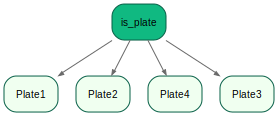

In [20]:
is_plate.view_parents(with_children=True)

### `well`

We might also want to add the well information, so that we can link image files and parse images based on well coordinates. To do this, let's first extract well locations from the table:

In [21]:
ln.settings.upon_create_search_name = False

wells = []
for well in meta["well"].unique():
    wells.append(ln1.Well(name=well, row=well[0], column=int(well[1:])))

ln.save(wells)

ln.settings.upon_create_search_name = True

### `site`

In [22]:
is_site = ln.ULabel(name="is_site", description="parent of sites")
is_site.save()

In [23]:
sites = []
for name in meta["site"].unique():
    record = ln.ULabel(name=f"Site{name}")
    sites.append(record)

ln.save(sites)
is_site.children.set(sites)

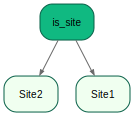

In [24]:
is_site.view_parents(with_children=True)

### `well_type`

In [25]:
is_well_type = ln.ULabel(name="is_well_type", description="parent of well types")
is_well_type.save()

In [26]:
well_types = []
for name in meta["well_type"].unique():
    record = ln.ULabel(name=name)
    well_types.append(record)

ln.save(well_types)
is_well_type.children.set(well_types)

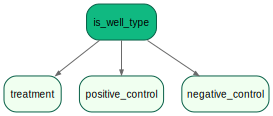

In [27]:
is_well_type.view_parents(with_children=True)

### `sirna`

add sirna to Treatment table:

In [28]:
ln.settings.upon_create_search_name = False

sirnas = []
for sirna in meta["sirna"].unique():
    record = ln1.Treatment(
        name=sirna,
        type="genetic",
        system="siRNA",
        description="ThermoFisher ID of siRNA",
    )
    sirnas.append(record)

ln.save(sirnas)

ln.settings.upon_create_search_name = True

### assay/readout

We can do the same for other ontologies that we are interested to curate. For example, the type of readout. We are going to choose the "high content screen" readout.

In [29]:
ln.Feature(name="assay", type="category").save()

In [30]:
assay = lb.ExperimentalFactor.from_bionty(name="high content screen")
assay.save(parents=False)

✅ created 1 ExperimentalFactor record from Bionty matching name: 'high content screen'


### features

In [31]:
var_features = ln.Feature.from_df(embedding)
ln.save(var_features)

In [65]:
obs_features = ln.Feature.from_df(meta)
ln.save(obs_features)

In [9]:
features = ln.Feature.lookup()

## Register metadata as a parquet file:

In [11]:
file_meta = ln.File.from_df(
    meta,
    field=ln.Feature.name,
    key="rxrx1/metadata.parquet",
    description="Metadata with file paths for each RxRx1 image.",
)

💡 file will be copied to default storage upon `save()` with key 'rxrx1/metadata.parquet'
✅ 12 terms (100.00%) are validated for name


In [12]:
file_meta.save()

✅ saved 1 feature set for slot: 'columns'
✅ storing file 'F3QsPA8e5pAU1McW1EV5' at 'rxrx1/metadata.parquet'
... uploading F3QsPA8e5pAU1McW1EV5.parquet: 1.00


In [11]:
# obs
file_meta.labels.add(cell_lines, features.cell_type)
file_meta.labels.add(train_test, features.dataset)
file_meta.labels.add(experiments, features.experiment)
file_meta.labels.add(plates, features.plate)
file_meta.labels.add(wells, features.well)
file_meta.labels.add(sites, features.site)
file_meta.labels.add(well_types, features.well_type)
file_meta.labels.add(sirnas, features.sirna)
# external
file_meta.labels.add(assay, features.assay)

## Create `AnnData` object for embeddings and metadata

In [66]:
adata = ad.AnnData(embedding)
adata.obs = meta.set_index("site_id").loc[adata.obs.index]

In [67]:
adata

AnnData object with n_obs × n_vars = 125510 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'file_keys'

## Register AnnData and link to metadata records

In [74]:
file = ln.File.from_anndata(
    adata,
    field=ln.Feature.name,
    key="rxrx1/embeddings.h5ad",
    description="Metadata annotated deep learning embeddings for each RxRx1 image.",
)

💡 file will be copied to default storage upon `save()` with key 'rxrx1/embeddings.h5ad'
💡 parsing feature names of X stored in slot 'var'
✅    128 terms (100.00%) are validated for name
✅    loaded: FeatureSet(id='bcFh49e3BDYaSD4zgfjP', n=128, type='number', registry='core.Feature', hash='egYMAVrfSHIzTcpaI4OA', updated_at=2023-09-19 11:04:00, created_by_id='kmvZDIX9')
✅    linked: FeatureSet(id='bcFh49e3BDYaSD4zgfjP', n=128, type='number', registry='core.Feature', hash='egYMAVrfSHIzTcpaI4OA', updated_at=2023-09-19 11:04:00, created_by_id='kmvZDIX9')
💡 parsing feature names of slot 'obs'
✅    11 terms (100.00%) are validated for name
✅    loaded: FeatureSet(id='rNhSgklulPk78bxTh3KA', n=11, registry='core.Feature', hash='eKK6LQlam2QPv1E6XAhl', updated_at=2023-09-19 11:44:19, modality_id='DpjC4gSK', created_by_id='kmvZDIX9')
✅    linked: FeatureSet(id='rNhSgklulPk78bxTh3KA', n=11, registry='core.Feature', hash='eKK6LQlam2QPv1E6XAhl', updated_at=2023-09-19 11:44:19, modality_id='DpjC4gSK',

In [75]:
file.save()

✅ storing file 'UPn1hQVAzQ5efRxF6ce5' at 'rxrx1/embeddings.h5ad'
... uploading UPn1hQVAzQ5efRxF6ce5.h5ad: 1.00


In [77]:
# obs
file.labels.add(cell_lines, features.cell_type)
file.labels.add(train_test, features.dataset)
file.labels.add(experiments, features.experiment)
file.labels.add(plates, features.plate)
file.labels.add(wells, features.well)
file.labels.add(sites, features.site)
file.labels.add(well_types, features.well_type)
file.labels.add(sirnas, features.sirna)
# external
file.labels.add(assay, features.assay)

✅ loaded: FeatureSet(id='gQ64vjd1rxzwLWpbejz9', n=1, registry='core.Feature', hash='FiJ4ucNfT44nBYrOzjqB', updated_at=2023-09-19 11:27:57, modality_id='DpjC4gSK', created_by_id='kmvZDIX9')
✅ linked new feature 'assay' together with new feature set FeatureSet(id='gQ64vjd1rxzwLWpbejz9', n=1, registry='core.Feature', hash='FiJ4ucNfT44nBYrOzjqB', updated_at=2023-09-19 11:47:02, modality_id='DpjC4gSK', created_by_id='kmvZDIX9')


In [78]:
file.labels

Labels:
  🏷️ cell_lines (4, bionty.CellLine): 'HUV-EC-C cell', 'U-2 OS cell', 'hTERT RPE-1 cell', 'Hep G2 cell'
  🏷️ experimental_factors (1, bionty.ExperimentalFactor): 'high content screen'
  🏷️ experiments (51, lamin1.Experiment): 'HUVEC-08', 'U2OS-03', 'HUVEC-11', 'HUVEC-12', 'HUVEC-09', 'U2OS-04', 'RPE-11', 'HEPG2-06', 'HUVEC-13', 'RPE-05', ...
  🏷️ wells (308, lamin1.Well): 'L17', 'L16', 'F21', 'E14', 'G15', 'F13', 'L09', 'G08', 'F15', 'B05', ...
  🏷️ treatments (1139, lamin1.Treatment): 's20985', 's228529', 's18905', 's36915', 's18325', 's21704', 's28390', 's27766', 's36286', 's39443', ...
  🏷️ ulabels (11, core.ULabel): 'test', 'treatment', 'Site2', 'Site1', 'Plate1', 'positive_control', 'Plate2', 'Plate4', 'negative_control', 'train', ...

In [79]:
file.features

Features:
  var: FeatureSet(id='bcFh49e3BDYaSD4zgfjP', n=128, type='number', registry='core.Feature', hash='egYMAVrfSHIzTcpaI4OA', updated_at=2023-09-19 11:04:00, created_by_id='kmvZDIX9')
    feature_93 (number)
    feature_105 (number)
    feature_116 (number)
    feature_23 (number)
    feature_50 (number)
    feature_27 (number)
    feature_37 (number)
    feature_1 (number)
    feature_81 (number)
    feature_0 (number)
    feature_119 (number)
    feature_125 (number)
    feature_47 (number)
    feature_8 (number)
    feature_126 (number)
    feature_11 (number)
    feature_75 (number)
    feature_16 (number)
    feature_63 (number)
    feature_113 (number)
    feature_71 (number)
    feature_4 (number)
    feature_60 (number)
    feature_118 (number)
    feature_112 (number)
    feature_123 (number)
    feature_69 (number)
    feature_51 (number)
    feature_53 (number)
    feature_73 (number)
    feature_14 (number)
    feature_86 (number)
    feature_55 (number)
    feature_77

In [80]:
file.feature_sets.df()

,name,n,type,modality_id,registry,hash,updated_at,created_by_id
id,,,,,,,,
bcFh49e3BDYaSD4zgfjP,None,128,number,None,core.Feature,egYMAVrfSHIzTcpaI4OA,2023-09-19 13:04:00,kmvZDIX9
gQ64vjd1rxzwLWpbejz9,None,1,None,DpjC4gSK,core.Feature,FiJ4ucNfT44nBYrOzjqB,2023-09-19 13:47:02,kmvZDIX9
rNhSgklulPk78bxTh3KA,None,11,None,DpjC4gSK,core.Feature,eKK6LQlam2QPv1E6XAhl,2023-09-19 13:44:19,kmvZDIX9


In [81]:
file.features["obs"].df()

,name,type,modality_id,unit,description,registries,synonyms,updated_at,created_by_id
id,,,,,,,,,
5RXkKRNY7BgV,well_type,category,None,None,None,core.ULabel,None,2023-09-19 13:44:19,kmvZDIX9
DUzDHbttLssA,sirna_id,category,None,None,None,None,None,2023-09-19 13:44:19,kmvZDIX9
3wuv7DCHL6CP,well,category,None,None,None,lamin1.Well,None,2023-09-19 13:47:01,kmvZDIX9
g6nY4RszJxf1,plate,category,None,None,None,core.ULabel,None,2023-09-19 13:47:01,kmvZDIX9
mXGssomIkT3O,site,category,None,None,None,core.ULabel,None,2023-09-19 13:47:01,kmvZDIX9
lul3qCosyI7A,experiment,category,None,None,None,lamin1.Experiment,None,2023-09-19 13:47:01,kmvZDIX9
led3PypVnP6j,well_id,category,None,None,None,None,None,2023-09-19 13:47:01,kmvZDIX9
fuG3rNZAUhHI,file_keys,object,None,None,None,None,None,2023-09-19 13:47:01,kmvZDIX9
qwcleYzHt7Yl,dataset,category,None,None,None,core.ULabel,None,2023-09-19 13:44:19,kmvZDIX9


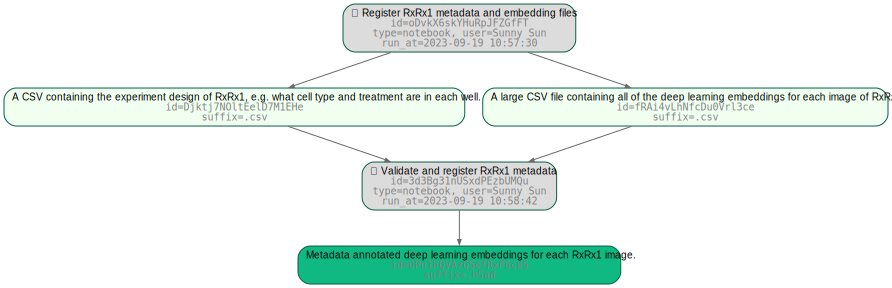

In [82]:
file.view_flow()